In [1]:
import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')

import PM7_calculator as pm7

In [2]:
xyz_filepath = '/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/fragments_single/NN_opt.xyz'
mop_filepath = '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/test.mop'
pm7.generate_input(xyz_filepath, mop_filepath)

In [3]:
# fragments
for s in ['CC', 'NN', 'OO', 'FF']:
    xyz_filepath = f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/fragments_single/{s}_opt.xyz'
    mop_filepath = f'/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/{s}_frag.mop'
    pm7.generate_input(xyz_filepath, mop_filepath)

In [4]:
# diatomics
elements = ['C', 'N', 'O', 'F']
for s1 in range(4):
    for s2 in range(s1, 4):
        smiles = f'{elements[s1]}{elements[s2]}'
        xyz_filepath = f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/{smiles}_opt.xyz'
        print(xyz_filepath)
        mop_filepath = f'/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/{smiles}.mop'
        pm7.generate_input(xyz_filepath, mop_filepath)

/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/CC_opt.xyz
/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/CN_opt.xyz
/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/CO_opt.xyz
/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/CF_opt.xyz
/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/NN_opt.xyz
/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/NO_opt.xyz
/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/NF_opt.xyz
/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/OO_opt.xyz
/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/OF_opt.xyz
/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/F

In [12]:
# modify mop-files
import glob
glob.glob('/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/*.mop')

['/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/CN.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/CC_frag.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/CO.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/NN_frag.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/FF.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/CF.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/test.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/FF_frag.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/OF.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/OO.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/NN.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/CC.mop',
 '/data/sahre/projects/atomic-energ

In [14]:
paths = ['/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/CN.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/CO.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/NN_frag.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/FF.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/CF.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/FF_frag.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/OF.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/OO.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/NN.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/CC.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/OO_frag.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/NF.mop',
 '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/NO.mop']

In [15]:
#mopfile_path = '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/CC_frag.mop'
for mopfile_path in paths:
    with open(mopfile_path, 'r') as f:
        mopfile = f.readlines()
        mopfile[0] = 'PRECISE ' + mopfile[0]
        append = ['\n', 'oldgeo Thermo=(100,200)\n', 'Comment 1\n', 'Comment 2\n']
        mopfile.extend(append)

    with open(mopfile_path, 'w') as f:
        f.writelines(mopfile)

In [5]:
# parse PM7 .arc file for heat of formation

import glob

# heat of formation
hof = dict()
hof_frag = dict()

arcfiles = glob.glob('/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/*.arc')

for a in arcfiles:
    name = a.split('/')[-1].split('.')[0]
    with open(a, 'r') as f:
        for line in f:
            if 'HEAT OF FORMATION' in line:
                if 'frag' in name:
                    hof_frag[name] = float(line.split()[4])
                else:
                    hof[name] = float(line.split()[4])

In [6]:
bde = dict()
# diatomics
elements = ['C', 'N', 'O', 'F']
for s1 in range(4):
    for s2 in range(s1, 4):
        mol = elements[s1] + elements[s2]
        e_frag1 = hof_frag[f'{mol[0]*2}_frag']
        e_frag2 = hof_frag[f'{mol[1]*2}_frag']

        bde[mol] = -(hof[mol] - e_frag1 - e_frag2)

In [11]:
import utils_qm as uqm
uqm.save_obj(bde, '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/bde_pm7')


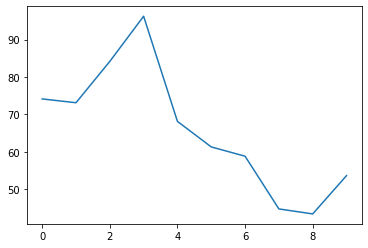

In [12]:
from matplotlib import pyplot as plt

plt.plot(bde.values())

dict_values([-74.13705999999999, -73.12332, -84.16457, -96.23496, -68.13438000000001, -61.309020000000004, -58.824490000000004, -44.73897, -43.40669, -53.64506])

In [44]:
# parse PM7 .out file for heat of formation, ZPE and vib+rot

import glob

# heat of formation
properties = dict()

outfiles = glob.glob('/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/*.out')

for a in outfiles:
    name = a.split('/')[-1].split('.')[0]
    prop_dict = {'hof':0, 'ZPE':0, 'enthalpy':0}
    with open(a, 'r') as f:
        for line in f:
            if 'ZERO POINT ENERGY' in line:
                try:
                    prop_dict['ZPE'] = float(line.split()[3])
                except ValueError:
                    print(f'Value error excepted in {a}')

            if 'CALCULATED THERMODYNAMIC PROPERTIES' in line:
                thd_line = ''
                for i in range(10):
                    thd_line=f.readline()
                heat_formation, enthalpy = float(thd_line.split()[1]), float(thd_line.split()[2])/1000
                prop_dict['hof'] = heat_formation
                prop_dict['enthalpy'] = enthalpy
    prop_dict['energy'] = prop_dict['hof'] - prop_dict['enthalpy'] - prop_dict['ZPE']
    properties[name] = prop_dict

Value error excepted in /data/sahre/projects/atomic-energies/data/bonding_trends/pm7/thermo/CC.out


In [46]:
bde = dict()
# diatomics
elements = ['C', 'N', 'O', 'F']
for s1 in range(4):
    for s2 in range(s1, 4):
        mol = elements[s1] + elements[s2]
        e_frag1 = properties[f'{mol[0]*2}_frag']['energy']
        e_frag2 = properties[f'{mol[1]*2}_frag']['energy']

        bde[mol] = -(properties[mol]['energy'] - e_frag1 - e_frag2)

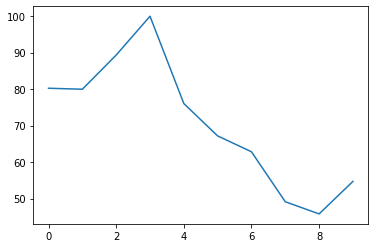

In [51]:
from matplotlib import pyplot as plt
plt.plot(bde.values())

In [52]:
import utils_qm as uqm
uqm.save_obj(bde, '/data/sahre/projects/atomic-energies/data/bonding_trends/pm7/bde_pm7_corrected')
